In [1]:
# Task 2 - Clustering on Mall_Customers.csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


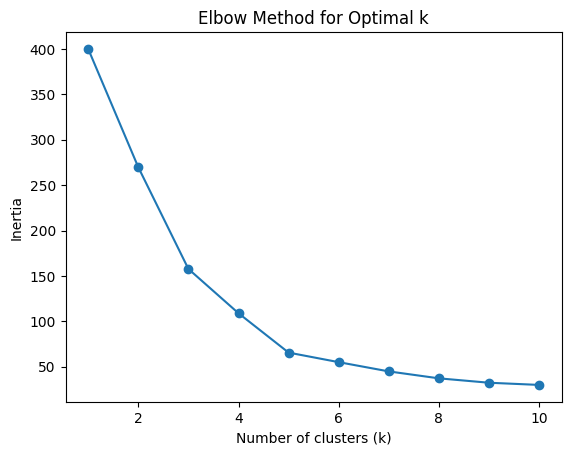

In [3]:
plt.figure()
plt.plot(K, inertia, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [4]:
# From elbow, choose k=5 (example, adjust if needed)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = clusters


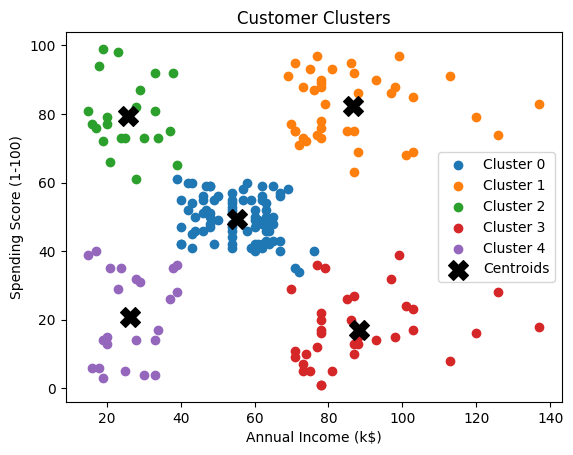

In [5]:
# Plot clusters
plt.figure()
for cluster in range(k_opt):
    cluster_points = df[df["Cluster"] == cluster]
    plt.scatter(cluster_points["Annual Income (k$)"],
                cluster_points["Spending Score (1-100)"],
                label=f"Cluster {cluster}")
plt.scatter(kmeans.cluster_centers_[:, 0] * X["Annual Income (k$)"].std() + X["Annual Income (k$)"].mean(),
            kmeans.cluster_centers_[:, 1] * X["Spending Score (1-100)"].std() + X["Spending Score (1-100)"].mean(),
            color='black', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Clusters")
plt.legend()
plt.show()

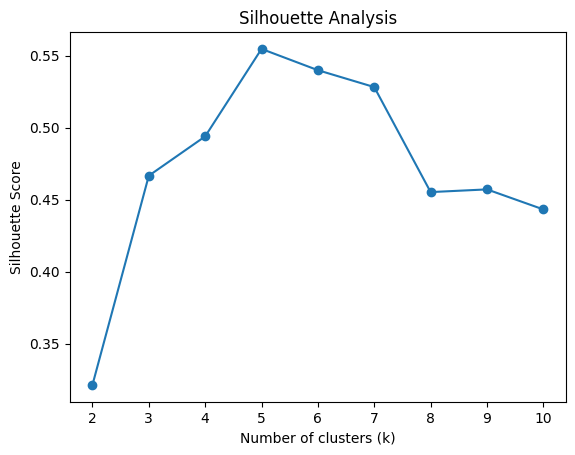

Silhouette Scores by k: [0.3212707813918878, 0.46658474419000145, 0.4939069237513199, 0.5546571631111091, 0.5398800926790663, 0.5281492781108291, 0.4552147906587443, 0.4570853966942764, 0.4431713026508046]


In [6]:
# Bonus Task - Silhouette Score for different k
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(range(2, 11), silhouette_scores, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

print("Silhouette Scores by k:", silhouette_scores)
